<a href="https://colab.research.google.com/github/Puspraj/Image_Scraping_Classification/blob/main/Image_Scraping_Classification_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from glob import glob

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


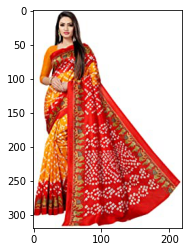

In [3]:
img=mpimg.imread('/content/drive/MyDrive/Colab Notebooks/train_image/Sarees1/img_1157.jpeg')
plt.imshow(img)
plt.show()

In [4]:
Image_Size=(224,224)
train_image="/content/drive/MyDrive/Colab Notebooks/train_image"
test_image="/content/drive/MyDrive/Colab Notebooks/test_image"

In [5]:
inception=InceptionV3(input_shape=(224,224,3), weights='imagenet', include_top=False)

87916544/87910968 [==============================] - 1s 0us/step


In [6]:
for layer in inception.layers:
  layer.trainable = False

In [7]:
folders=glob('/content/drive/MyDrive/Colab Notebooks/train_image/*')

In [8]:
folders

['/content/drive/MyDrive/Colab Notebooks/train_image/Jeans1',
 '/content/drive/MyDrive/Colab Notebooks/train_image/Sarees1',
 '/content/drive/MyDrive/Colab Notebooks/train_image/Trouser1']

In [9]:
x = Flatten()(inception.output)

In [10]:
prediction=Dense(len(folders), activation='softmax')(x)

In [11]:
model=Model(inputs=inception.input, outputs=prediction)

In [12]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [13]:
model.compile(optimizer='adam',
               loss='categorical_crossentropy',
               metrics=['accuracy']
               )

In [14]:
# Now i am going to use image data generator to import the image from dataset
train_datagen=ImageDataGenerator(rescale=1.0/255,
                                shear_range=0.3,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1.0/255)

In [15]:
train_data=train_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/train_image',
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             batch_size=16,
                                             class_mode='categorical')

Found 1137 images belonging to 3 classes.


In [16]:
test_data=test_datagen.flow_from_directory('/content/drive/MyDrive/Colab Notebooks/test_image',
                                           target_size=(224,224),
                                           color_mode='rgb',
                                           batch_size=16,
                                           class_mode='categorical')

Found 345 images belonging to 3 classes.


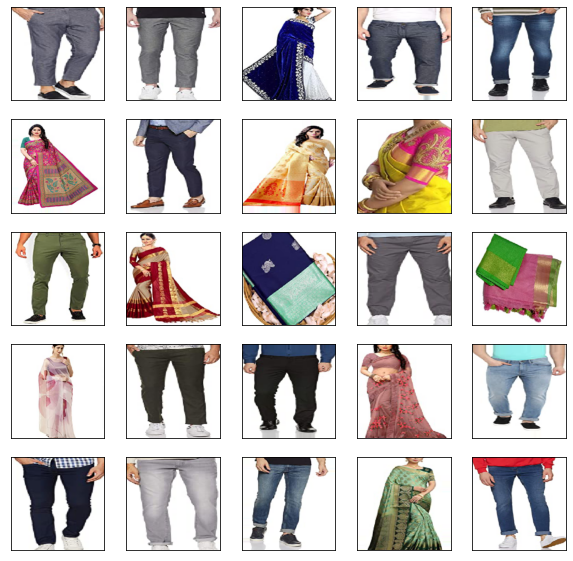

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  for x_batch,y_batch in train_data:
    image=x_batch[0]
    plt.imshow(image)
    break
plt.show()

In [ ]:
image=model.fit_generator(train_data,
                          epochs=10,
                          validation_data=test_data,
                          steps_per_epoch=len(train_data),
                          validation_steps=len(test_data)
                          )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
72/72 [==============================] - 804s 11s/step - loss: 2.6792 - accuracy: 0.7342 - val_loss: 0.6115 - val_accuracy: 0.9101
Epoch 2/10
72/72 [==============================] - 163s 2s/step - loss: 0.9089 - accuracy: 0.8886 - val_loss: 0.4880 - val_accuracy: 0.9043
Epoch 3/10
72/72 [==============================] - 163s 2s/step - loss: 0.6682 - accuracy: 0.9064 - val_loss: 0.4613 - val_accuracy: 0.9507
Epoch 4/10
72/72 [==============================] - 163s 2s/step - loss: 0.6859 - accuracy: 0.9206 - val_loss: 0.5714 - val_accuracy: 0.9304
Epoch 5/10
72/72 [==============================] - 163s 2s/step - loss: 0.4995 - accuracy: 0.9328 - val_loss: 0.2372 - val_accuracy: 0.9623
Epoch 6/10
72/72 [==============================] - 163s 2s/step - loss: 0.6006 - accuracy: 0.9205 - val_loss: 1.2748 - val_accuracy: 0.8957
Epoch 7/10
72/72 [==============================] - 163s 2s/step - loss: 0.9411 - accuracy: 0.9140 - val_loss: 1.1476 - val_accuracy: 0.9130
Epoch 8/10
7